# Welcome to your second assignment!

Please submit your solution of this notebook in the Whiteboard at the corresponding Assignment entry. We need you to upload the .ipynb-file and the exported .pdf of this notebook.

If you have any questions, ask them in either in the tutorials or in the "Mattermost" channel: https://mattermost.imp.fu-berlin.de/biorobotics/channels/ssl_ws_2324


In this assignment, we want you to get more comfortable with unsupervised learning algorithms and building models using the machine learning library [PyTorch](https://pytorch.org/). This also includes deadling with latent representations of our model.

# Slide Review

[Google Form](https://forms.gle/7EjyGKvmbBUT2N7y7) for the slide review. Please take a minute to scroll over the slides again and improve your lecture.

Please make sure to only choose your top 5 slides per lecture!

# PapagAI

From this week onwards we start the reflective study we told you about on the first lecture.
Register on the [PapagAI website](https://www.papag.ai) and write your first reflection about your impressions and challenges in the context of the lectures and tutorials you had this and previous week. The size of reflection can be anywhere bigger than 100 words. You can check out this [YouTube video](https://www.youtube.com/watch?v=QdmZHocZQBk&ab_channel=FernandoRamosL%C3%B3pez) with instructions on how to register, create a reflection and get an ai feedback.

Please note, that this task is an obligatory one for this course and make sure each of you does the reflection, not only one person per group.

#### Please state both names of your group members here:
Authors: Omar Ahmed and Can Aydin

# Assignment 2: DeepCluster

Inspired by [DeepCluster](https://arxiv.org/pdf/1807.05520.pdf), we want you perform representation learning on the MNIST dataset using kMeans.


## Ex. 2.1 Building a PyTorch model
Build a model with the follwoing architecture:

### *Input layer -> 4x Conv layer with [8,16,32,16] channels (kernel size of your choice) -> 1 FC layer -> output layer* <br>

Further information on the training process:
- Use ReLU functions as activations for all layers except the output layer,
- Use the softmax function on your output,
- Your training algorithm should use mini-batches with the size of your choice,
- Pick the optimizer you like the most

Train your classifier model on the [MNIST](https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html) handwritten digits dataset. You should be able to achieve an accuracy of at least 95% on the test set. Plot the loss per training epoch/iteration.  **(RESULT)**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split
import torch.nn.functional as F
import matplotlib.pyplot as plt

torch.manual_seed(42)

class ConvNeuralNetwork(nn.Module):
    def __init__(self):
        super(ConvNeuralNetwork, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
        )
        self.linear_layers = nn.Sequential(
            nn.Linear(16 * 28 * 28, 32),
            nn.ReLU(),
            nn.Linear(32, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

########Preparing the data########

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

train_size = int(0.8 * len(mnist_dataset))
test_size = len(mnist_dataset) - train_size

train_dataset, test_dataset = random_split(mnist_dataset, [train_size, test_size])

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

########Preparing the data########


model = ConvNeuralNetwork()
optimizer = optim.Adam(model.parameters(), lr = 0.001)
loss_function = nn.CrossEntropyLoss()


train_loss_values = []
test_Loss_values = []
epoch_count = []
epochs = 10

for epoch in range(epochs):
    model.train()

    for data in train_loader:
        inputs, labels = data
        optimizer.zero_grad()
        y_train = model(inputs)
        loss = loss_function(y_train, labels)
        loss.backward()
        optimizer.step()

    model.eval()
    test_loss = 0.0
    correct_predictions = 0
    total_samples = 0

###TESTING

    for data in test_loader:
        inputs, labels = data
        y_test = model(inputs)
        batch_loss = loss_function(y_test, labels)
        test_loss += batch_loss.item()
        y_test_softmax = F.softmax(y_test, dim=1)

        _, predicted = torch.max(y_test_softmax, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    test_loss /= len(test_loader)
    test_accuracy = correct_predictions / total_samples
    train_loss_values.append(test_loss)
    test_loss_values.append(test_accuracy)
    epoch_count.append(epoch + 1)

    print(f"Epoch {epoch}, Test Loss: {test_loss:.4f}, Test Accuracy: {100 * test_accuracy:.2f}%")



Epoch 0, Test Loss: 0.0808, Test Accuracy: 97.53%
Epoch 1, Test Loss: 0.0829, Test Accuracy: 97.55%
Epoch 2, Test Loss: 0.0514, Test Accuracy: 98.50%
Epoch 3, Test Loss: 0.0487, Test Accuracy: 98.60%
Epoch 4, Test Loss: 0.0493, Test Accuracy: 98.50%
Epoch 5, Test Loss: 0.0682, Test Accuracy: 98.17%
Epoch 6, Test Loss: 0.0569, Test Accuracy: 98.54%
Epoch 7, Test Loss: 0.0615, Test Accuracy: 98.47%
Epoch 8, Test Loss: 0.0586, Test Accuracy: 98.67%
Epoch 9, Test Loss: 0.0622, Test Accuracy: 98.67%


In [ ]:

print(len(train_loader)) # 60000 / 32
print(train_loss_values)

1500
[0.08082376696945479, 0.08288445129354174, 0.05137445692718029, 0.04870263392136743, 0.049311647151829674, 0.06815476758424968, 0.05687556516452241, 0.06148018531590545, 0.058574949036900456, 0.062227720326865285]


## Ex. 2.2 kMeans

Implement the k-Means clustering algorithm. **(RESULT)**

Plot the within cluster variance for different k's on the MNIST test set. **(RESULT)**


 20%|██        | 1/5 [00:10<00:42, 10.58s/it]

Converged after 1 iterations




 20%|██        | 1/5 [24:28<1:37:55, 1468.88s/it]

100%|██████████| 5/5 [00:27<00:00,  5.49s/it]
6it [00:32,  5.40s/it]                       
7it [00:38,  5.57s/it]
8it [00:44,  5.78s/it]
9it [00:50,  5.67s/it]
10it [00:55,  5.67s/it]
11it [01:01,  5.55s/it]
12it [01:07,  5.63s/it]
13it [01:12,  5.48s/it]
14it [01:17,  5.57s/it]
15it [01:23,  5.44s/it]
16it [01:29,  5.63s/it]
17it [01:34,  5.52s/it]
18it [01:40,  5.83s/it]
19it [01:46,  5.84s/it]
20it [01:52,  5.89s/it]
21it [02:04,  5.91s/it]

Converged after 21 iterations



27it [02:50,  6.31s/it]

Converged after 27 iterations



41it [04:28,  6.54s/it]

Converged after 41 iterations



31it [03:24,  6.59s/it]

Converged after 31 iterations



24it [02:34,  6.45s/it]

Converged after 24 iterations



28it [03:01,  6.48s/it]

Converged after 28 iterations



44it [04:52,  6.64s/it]

Converged after 44 iterations



36it [04:08,  6.90s/it]

Converged after 36 iterations


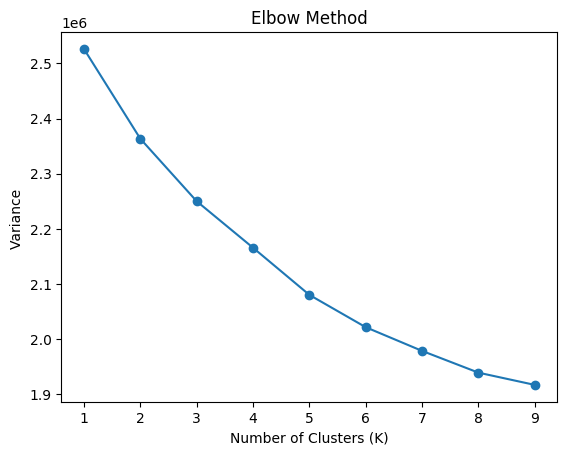

In [ ]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import random
from tqdm import tqdm
import matplotlib.pyplot as plt


########Preparing the data########
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)

train_size = int(0.8 * len(mnist_dataset))
test_size = len(mnist_dataset) - train_size

train_dataset, test_dataset = random_split(mnist_dataset, [train_size, test_size])

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
########Preparing the data########


#for batch in train_loader:
    #inputs, labels = batch
    #print("Input data shape:", inputs.shape)
    #print("Labels:", labels)

"""
K-means roadmap:
1) Initalize empty clusters and randomize the respective centriods
2) Assign datapoints to centriods
3) Update centriods
4) Stop when converged

Choosing k
1) Elbow method
"""

"""
1) Initalizing the empty clusters and randomizing the respective centroids"""


def your_kMeans(train_data,K,convergence_threshold=1e-4):
  random_index = random.sample(range(len(test_loader.dataset)),K)
  # One tensor contraining 5 centriods, each centriod is represented as a row
  centriods = torch.stack([test_loader.dataset[i][0] for i in random_index])
  cluster_assigns = [None] * len(test_loader.dataset)

  pbar = tqdm(total=5)  # progress bar
  iteration = 0


  """2) Assign datapoints to centriods"""

  while True:
    old_centroids = centriods.clone()
    for i, (data,_) in enumerate(test_loader.dataset):
      #Gets list of 5 distances, one for each centriod
      distances = [torch.dist(data,centriod)for centriod in centriods]
      temp = torch.argmin(torch.stack(distances))
      cluster_assigns[i] = temp

    """3) Update centriods"""

    for clx in range(K):
      cluster_ind = [i for i, allocation in enumerate(cluster_assigns) if allocation == clx]
      new_cluster_id = torch.stack([test_loader.dataset[i][0] for i in cluster_ind])
      centriods[clx] = new_cluster_id.mean(dim=0)

    """4) Stop when converged"""

    max_movement = torch.max(torch.abs(centriods - old_centroids))
    if max_movement < convergence_threshold:
        print(f"Converged after {iteration} iterations")
        break
    pbar.update(1)
    iteration += 1
  pbar.close()
  return cluster_assigns, centriods

def calculate_within_cluster_variance(data, cluster_assigns, centriods):
    variances = [0] * K
    for i in range(K):
        cluster_data = [data[j][0] for j in range(len(data)) if cluster_assigns[j] == i]
        if len(cluster_data) > 0:
            cluster_data = torch.stack(cluster_data)
            centroid = centriods[i]
            distances = torch.sum((cluster_data - centroid) ** 2, dim=1)
            variances[i] = torch.sum(distances).item()
    return sum(variances)

k_range = range(1,10)
k_values = list(k_range)
variance = []

for K in k_range:
    cluster_assigns, final_centriods = your_kMeans(test_loader.dataset, K)
    inertia = calculate_within_cluster_variance(test_loader.dataset, cluster_assigns, final_centriods)
    variance.append(inertia)

plt.plot(k_values, variance, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Variance ')
plt.title('Elbow Method')
plt.show()








## Ex. 2.3 DeepCluster

[DeepCluster](https://arxiv.org/pdf/1807.05520.pdf) trains representations using k-Means labels. We want you to do the same with your model and kMeans algorithm above.
Train your model from scratch again on a classifier (one fully connected layer) using the newly assigned kMeans labels as targets. **(RESULT)**<br>

Evaluate the model performance training only a new classifier (again, one fc layer), and do NOT retrain the whole model. State the accuracy of your final classifier on the MNIST test set. **(RESULT)**

Info: If you think your k-Means has flaws or is running too slow for this task, feel free to use a library version, i.e. sklearn.

In [ ]:
len(cluster_assigns)
len(train_loader.dataset)

48000

##Using Skilearn K-Means (mine is too slow)

In [ ]:
model

ConvNeuralNetwork(
  (conv_layers): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=12544, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=10, bias=True)
  )
)

##Roadmap
1. Extract features using CNN (Done 58 - 88)
2. Apply K-Means to the features (Done 90- 93)
3. Assign psuedo-labels (Done 97)
4. Train a classifier on the pseudolabels ( Just on FC )
5. Evaluate


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split,TensorDataset
from tqdm import tqdm
import random
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import numpy as np

# CNN - Removed the classifier
class ConvNeuralNetwork(nn.Module):
    def __init__(self):
        super(ConvNeuralNetwork, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        return x

# Classifier

class Classifier(nn.Module):
    def __init__(self, input_size, output_size):
        super(Classifier,self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 32),
            nn.RELU(),
            nn.Linear(32,output_size)
        )

    def forward(self, x):
        x = self.fc(x)
        return x

# Loading data

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 1. Extracting features from CNN

    #1.1 Pretain CNN from scratch
model = ConvNeuralNetwork()
optimizer = optim.Adam(model.parameters(), lr = 0.001)
loss_function = nn.CrossEntropyLoss()

epochs = 10

for epoch in range(epochs):
    model.train()
    for data in train_loader:
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()


    # 1.2 Extract features
features = []
labels = []

with torch.no_grad():
    model.eval()
    for data in train_loader:
        inputs, outputs = data
        y_train = model(inputs)
        features.extend(y_train.data.numpy())
        labels.extend(outputs.numpy())

# 2. Applying kmeans to features

kmeans = KMeans(n_clusters = 10, random_state = 42)
kmeans.fit(features)

# 3. Assigning pseudolabels

pseudo_labels = kmeans.predict(features) # 1D Array of 60000 elements.

# 4. Classifier hyperparameters

input_size = features.shape[1]
output_size = 10

classifier = Classifier(input_size,output_size)
classifier_loss_function = nn.CrossEntropyLoss()
classifier_optimizer = optim.Adam(classifier.parameters(), lr = 0.001)

#5. Training the classifier on the pseudolabels

pseudo_labels_t = torch.LongTensor(pseudo_labels)
new_dataset = TensorDataset(torch.Tensor(features), pseudo_labels_t)
new_dataloader= DataLoader(new_dataset,batch_size = 32, shuffle = True)


for epoch in range(epochs):
  classifier.train()
  for data in new_dataloader:
    inputs,labels = data
    classifier_optimizer.zero_grad()
    outputs = classifier(inputs)
    loss = classifier_loss_function(outputs,labels)
    loss.backward()
    classifier_optimizer.step()

# 5. Evaluating on MNIST test dataset, and showing accuracy finally

classifier_predictions = []
actual_labels = []

with torch.no_grad():
  classifier.eval()
  for data in test_loader:
    inputs, labels = data
    y_test = model(inputs)
    classifier_y_test = classifier(y_test)
    classifier_predictions.extend(classifier_y_test.argmax(dim=1).numpy())
    actual_labels.extend(labels.numpy())

accuracy = accuracy_score(actual_labels, classifier_predictions)
print(f"Accuracy of the final classifier: {accuracy * 100:.2f}%")



